# Applied Data Science Capstone Project 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hello Capstone Project Course")

Hello Capstone Project Course


In [4]:
df = pd.read_csv("Data-Collisions.csv")
df.head()
print(df.columns)


C:\Users\Aeesha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [5]:
df.shape
df['PEDROWNOTGRNT']
df['SPEEDING']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
194668    NaN
194669    NaN
194670    NaN
194671    NaN
194672    NaN
Name: SPEEDING, Length: 194673, dtype: object

In [6]:
#we dont need objectID, INCKEY, COLDETKEY, INCDATE, INCDTTM, 'SDOT_COLDESC', SDOTCOLNUM, 'ST_COLCODE', 'ST_COLDESC
#not sure = X, Y, 'SDOT_COLCODE'
#df = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'SDOTCOLNUM'])


## Data Understanding - Group the data to understand the content of each attributes



In [7]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [8]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [9]:
df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [10]:
df['PEDCYLCOUNT'].value_counts() #remove it since it is not really significant

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [11]:
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [12]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [13]:
df['INATTENTIONIND'].value_counts() #drop because it has lots of NaN values

Y    29805
Name: INATTENTIONIND, dtype: int64

In [14]:
df['UNDERINFL'].value_counts() #we cant make much of the data so we drop it

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [15]:
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())
print(df['SPEEDING'].value_counts()) #we dont need this cos ti has lots of Nan
print(df['HITPARKEDCAR'].value_counts())
print(df['SEVERITYCODE'].value_counts())

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

## Create the features dataframe


### Convert categorical to numerical

In [16]:
# addrtype feature
print(df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True))

print(print(df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)))
print(print(df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)))
print(print(df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)))
print(print(df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)))
print(print(df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize=True)))

#conver hitparkedcar to numerical
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64
COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793

### use one hot encoding to convert the categorical variables that are not binary to numerical


In [17]:
Features_toconvert = df[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
Features = df[['PERSONCOUNT','PEDCOUNT', 
              'VEHCOUNT','HITPARKEDCAR']]
Features = pd.concat([Features,pd.get_dummies(data = Features_toconvert, columns = ['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER',
                                                                    'ROADCOND','LIGHTCOND'])], axis=1)
Features.head()


,PERSONCOUNT,PEDCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,2,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,2,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,4,0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,2,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0


## Feature Selection

### specify the x and y dataframes


In [18]:
X = Features
X.head()

Y = df['SEVERITYCODE'].values
Y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [19]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 53) (155738,)
Test set: (38935, 53) (38935,)


## Classification Algorithms 


### KNN Algorithm


In [20]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
# Best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67833569, 0.73525106, 0.71996918, 0.74367536, 0.73543085,
       0.74714267, 0.7413895 , 0.75019905, 0.74449724])

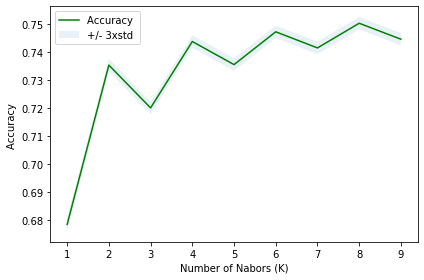

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy for KNN was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy for KNN was with 0.7501990496982149 with k= 8


In [24]:
# Building the model again, using the best k gotten above.  k=8
from sklearn.neighbors import KNeighborsClassifier
k = 8
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
1+1

2

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
yhat = LR_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

### SVM

In [30]:
#from sklearn import svm
#SVM_model = svm.SVC(probability=True)
#SVM_model.fit(X_train, y_train) 

In [31]:
#yhat = SVM_model.predict(X_test)
#yhat

## Evaluation

In [32]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [33]:
#KNN

yhat_knn = kNN_model.predict(X_test)
jaccard_knn = jaccard_similarity_score(yhat_knn, y_test)
f1score_knn = f1_score(yhat_knn, y_test)
probs = kNN_model.predict_proba(X_test)
logloss_knn = log_loss(y_test, probs)

## Decision Tree 
yhat_dt = DT_model.predict(X_test)
jaccard_dt = jaccard_similarity_score(yhat_dt, y_test)
f1score_dt = f1_score(yhat_dt, y_test)
probs = DT_model.predict_proba(X_test)
logloss_dt = log_loss(y_test, probs)

## Logistic Regression 
yhat_lr = LR_model.predict(X_test)
jaccard_lr = jaccard_similarity_score(yhat_lr, y_test)
f1score_lr = f1_score(yhat_lr, y_test)
probs = LR_model.predict_proba(X_test)
logloss_lr = log_loss(y_test, probs)



C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavi

In [34]:
## SVM
#yhat_svm = SVM_model.predict(X_test)
#jaccard_svm = jaccard_similarity_score(yhat_svm, y_test)
#f1score_svm = f1_score(yhat_svm, y_test)
#probs = SVM_model.predict_proba(X_test)
#logloss_svm = log_loss(y_test, probs)

In [35]:
table = pd.DataFrame()
table["Algorithm"] = ["KNN","Decision Tree","Logistic Regression"]
table["Jaccard"] = [jaccard_knn,jaccard_dt, jaccard_lr]
table["F1-score"] =[f1score_knn,f1score_dt,f1score_lr]
table["LogLoss"] =[logloss_knn, logloss_dt,logloss_lr]
table

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.750199,0.839181,1.064561
1,Decision Tree,0.753076,0.849546,0.493511
2,Logistic Regression,0.759933,0.850052,0.481817
